In [377]:
import requests
import xmltodict
import json
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate

In [332]:
def formatJson(data):
    return json.loads(json.dumps(data))
def xmlToDict(xml):
    return xmltodict.parse(xml)  

In [333]:

URL_GET_CODE_CITY = 'http://servicos.cptec.inpe.br/XML/listaCidades'
payload_city = {'city': 'sao jose dos campos'}
URL_PREDICTION_4DAYS = 'http://servicos.cptec.inpe.br/XML/cidade/%s/previsao.xml' % city['cidades']['cidade']['id']
r_locale = requests.get(URL_GET_CODE_CITY, params=payload_city)
city = formatJson(xmlToDict(r_locale.content))

r_prediction_4days = requests.get(URL_PREDICTION_4DAYS)
prediction_4days = formatJson(xmlToDict(r_prediction_4days.content))

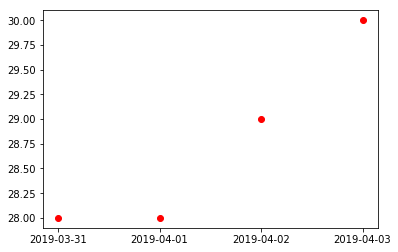

In [381]:
y_temp = [int(x['maxima']) for x in prediction_4days['cidade']['previsao']]
x_dias = [str(x['dia']) for x in prediction_4days['cidade']['previsao']]

u = plt.plot(x_dias,y_temp, 'ro')

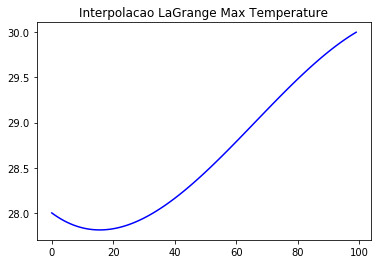

In [411]:
pyLagrange = scipy.interpolate.lagrange(t, y_temp)
n = 100
ts = np.linspace(t[0],t[-1],n)
yLagrange = pyLagrange(ts)
plt.title('Interpolacao LaGrange Max Temperature')
plt.plot(yLagrange,'b-',label = 'Polynomial')
plt.show()